In [1]:
pip install gym

Note: you may need to restart the kernel to use updated packages.


In [2]:
#Import dependencies
import numpy as np
import gym
import random
import time
from IPython.display import clear_output

In [3]:
#env = gym.make("FrozenLake-v1")
env = gym.make('CliffWalking-v0')

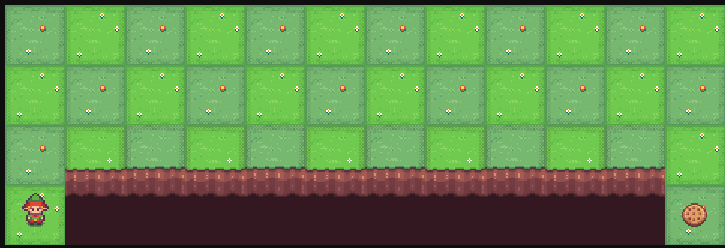

In [4]:
from IPython.display import Image
Image("Cliff Walking.png")

| State    | Description                    | Reward |
|----------|:------------------------------:|-------:|
|[3,0]   | Start at bottom-left           |        |
|[3,11]  | Goal at bottom-right           |        |
|[3,1..10] | Cliff at bottom-center         |    -100|

%**States are denoted following numpy indexing starting with 0 and [row, column]**

**Action:  Left, Right, Up, Down**

In [5]:
action_space_size = env.action_space.n
state_space_size = env.observation_space.n

q_table = np.zeros((state_space_size, action_space_size))
print(q_table)
print(np.shape(q_table))

[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
(48, 4)


In [8]:
num_episodes = 10000 #total no. of episodes the agent will play during training
max_steps_per_episode = 500 #one of the terminating condition, max no. steps in a single episode

learning_rate = 0.1 #high LR focus more on new, less on old; low LR learn nothing, use prior knowledge
discount_rate = 0.99 #high DR focus more on distant reward, low DR focus more on immediate reward

#epsilon-greedy
exploration_rate = 1
max_exploration_rate = 1
min_exploration_rate = 0.01
exploration_decay_rate = 0.01

### Trainning Phase

In [9]:
rewards_all_episodes = []
# Q-learning algorithm
for episode in range(num_episodes):
    state = env.reset()[0] #reset state of the env back to the starting state
    done = False #this makes sure whether or not the episode is finished, initialized to false
    rewards_current_episode = 0 #no rewards at the beginning of each episode
    # initialize new episode params for each time step

    for step in range(max_steps_per_episode): 
        # Exploration-exploitation trade-off
        exploration_rate_threshold = random.uniform(0, 1)
        if exploration_rate_threshold > exploration_rate:
            action = np.argmax(q_table[state,:]) 
        else:
            action = env.action_space.sample()
        # Take new action
        new_state, reward, done, truncated, info = env.step(action)
        # Update Q-table for Q(s,a)
        q_table[state, action] = q_table[state, action] * (1 - learning_rate) + \
        learning_rate * (reward + discount_rate * np.max(q_table[new_state, :]))
        # Transition to the next state
        state = new_state
        # Add new reward        
        rewards_current_episode += reward
        if done == True: 
            break
    # Exploration rate decay (at the end of one episode, we need to update the exploration rate)
    exploration_rate = min_exploration_rate + \
    (max_exploration_rate - min_exploration_rate) * np.exp(-exploration_decay_rate*episode)
    # Add current episode reward to total rewards list
    rewards_all_episodes.append(rewards_current_episode)

# Calculate and print the average reward per thousand episodes
rewards_per_thousand_episodes = np.split(np.array(rewards_all_episodes),num_episodes/1000)

count = 1000
print("********Average reward per thousand episodes********\n")
for r in rewards_per_thousand_episodes:
    print(count, ": ", str(sum(r/1000)))
    count += 1000

********Average reward per thousand episodes********

1000 :  -201.0110000000025
2000 :  -16.312999999999963
3000 :  -15.641999999999927
4000 :  -15.14799999999992
5000 :  -16.64399999999997
6000 :  -15.630999999999924
7000 :  -15.945999999999932
8000 :  -16.24899999999994
9000 :  -16.09999999999993
10000 :  -16.065999999999942


### Analysis: 

<span style="color:green;font-weight:700;font-size:15px">
    Now, for a different environment "Cliff Walking" with state space 48 (4*12), space size increased from 16 to 48, the average reward came out to be negative. So poorer performance for larger state space.
</span>

In [10]:
# Print updated Q-table
print("\n\n********Q-table********\n")
print(q_table)



********Q-table********

[[ -11.00307445  -11.01204955  -11.08762692  -11.03884623]
 [ -10.60640039  -10.57571828  -10.63124494  -10.62852859]
 [ -10.02075601   -9.94164251  -10.05166072  -10.00116421]
 [  -9.25786498   -9.26425112   -9.34007158   -9.25621185]
 [  -8.55402492   -8.53854937   -8.55571415   -8.57666985]
 [  -7.79907233   -7.77527001   -7.78182659   -7.86320004]
 [  -7.00515393   -6.98654857   -6.99222328   -7.0441521 ]
 [  -6.21774376   -6.17908619   -6.21811286   -6.25645844]
 [  -5.45187886   -5.37245891   -5.39325273   -5.50252344]
 [  -4.61133036   -4.55816527   -4.57138185   -4.59598757]
 [  -3.7878534    -3.74935024   -3.75721433   -3.77844962]
 [  -2.97918377   -3.09643158   -2.93957231   -3.05767931]
 [ -11.4259208   -11.41829188  -11.38684574  -11.41734496]
 [ -10.94117094  -10.90623706  -10.92265827  -10.97100194]
 [ -10.18184962  -10.1874546   -10.19712329  -10.27944075]
 [  -9.44418393   -9.40144062   -9.39579757   -9.53099326]
 [  -8.58848064   -8.57804028

### Agent playing the game

In [11]:
# Watch our agent play Frozen Lake by playing the best action 
# from each state according to the Q-table

for episode in range(3):
    # initialize new episode params
    state = env.reset()[0]
    done = False
    print("*****EPISODE ", episode+1, "*****\n\n\n\n")
    time.sleep(1)
    for step in range(max_steps_per_episode):  
        # Show current state of environment on screen
        clear_output(wait=True)
        env.render()
        time.sleep(0.3)
        # Choose action with highest Q-value for current state
        action = np.argmax(q_table[state,:])        
        # Take new action
        new_state, reward, done, truncated, info = env.step(action)
        if done:
            clear_output(wait=True)
            env.render()
            if reward == 1:
                # Agent reached the goal and won episode
                print("****You reached the goal!****")
                time.sleep(3)
            else:
                # Agent stepped in a hole and lost episode
                print("****You fell through a hole!****")
                time.sleep(3)
            clear_output(wait=True)
            break
        # Set new state
        state = new_state
env.close()

****You fell through a hole!****
